# Example usage

Table of contents
1. pd
    - munging
        - `drop_by_cardinality`
        - `order_df`
        - `camelcase2snakecase`
    - viz
        - `display_corr_matrix`

In [412]:
#Reload the import if necessary after changements
%matplotlib inline
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [413]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import dsgutils
import random
random.seed(3)

## pd

### munging

#### `drop_by_cardinality`

In [247]:
# Create dataframe
df = pd.DataFrame([[np.nan, 2, np.nan, 1], [3, 4, np.nan, 1],
                    [np.nan, 4, np.nan, 1]],
                  columns=list('ABCD'))

display(df)

,A,B,C,D
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


Drop by cardinality 0, will drop null columns

In [248]:
display_df = dsgutils.pd.munging.drop_by_cardinality(df, values_to_drop=[0])
display(display_df)

,A,B,D
0,NaN,2,1
1,3.0,4,1
2,NaN,4,1


Drop by cardinality 0 and 1, will drop columns and columns with cardinality of 1

In [249]:
df = pd.DataFrame([[np.nan, 2, np.nan, 1], [3, 4, np.nan, 1],
                    [np.nan, 4, np.nan, 1]],
                  columns=list('ABCD'))

display_df = dsgutils.pd.munging.drop_by_cardinality(df, values_to_drop=[0, 1])
display(display_df)

,B
0,2
1,4
2,4


Return the values that have been dropped

In [250]:
df = pd.DataFrame([[np.nan, 2, np.nan, 1], [3, 4, np.nan, 1],
                    [np.nan, 4, np.nan, 1]],
                  columns=list('ABCD'))

display_df, dropped = dsgutils.pd.munging.drop_by_cardinality(df, values_to_drop=[0, 1], return_dropped=True)
display(df)
print(dropped)

,B
0,2
1,4
2,4


{'A': 1, 'D': 1, 'C': 0}


#### `order_df`

In [251]:
# Create dataframe
df = pd.DataFrame([[np.nan, 2, np.nan, 1], [3, 4, np.nan, 1],
                    [np.nan, 4, np.nan, 1]],
                  columns=list('ABCD'))

display(df)

,A,B,C,D
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


Bring `C` and `D` to front

In [252]:
display_df = dsgutils.pd.munging.order_df(df, first=['C', 'D'])
display(display_df)

,C,D,A,B
0,NaN,1,NaN,2
1,NaN,1,3.0,4
2,NaN,1,NaN,4


Put `C` in the end

In [253]:
display_df = dsgutils.pd.munging.order_df(df, last=['C'])
display(display_df)

,B,A,D,C
0,2,NaN,1,NaN
1,4,3.0,1,NaN
2,4,NaN,1,NaN


#### `camelcase2snake_case`

In [254]:
df = pd.DataFrame([[np.nan, 2, np.nan, 1], [3, 4, np.nan, 1],
                    [np.nan, 4, np.nan, 1]],
                  columns=['productID', 'StoreID', 'customerId', 'dayID'])

display(df)

,productID,StoreID,customerId,dayID
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


In [255]:
display_df = dsgutils.pd.munging.camelcase2snake_case(df)
display(display_df)

,product_id,store_id,customer_id,day_id
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


#### `pivot_by_2_categories`

In [256]:
import random
product_name_list = ['basket', 'tee-shirt', 'short']*100
product_brand_list = ['nike', 'addidas', 'puma', 'oxbow']*100
df_prod = pd.DataFrame(np.transpose([np.round(np.random.rand(100)*10),
                                     np.round(np.random.rand(100)*3),
                                     np.round(np.random.rand(100)*45), 
                                     np.round(np.random.rand(100)*30),
                                     random.sample(product_name_list, k = 100),
                                     random.sample(product_brand_list, k = 100)
                                     ]),
                       columns=['product_id', 'store_id', 'customer_id', 'day_id', 'product_name', 'product_brand'])
                  
df_prod['month'] = random.sample(['jan', 'fev', 'mars', 'april', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec']*100, k = 100)
df_prod['year']= random.sample(['2017', '2018']*100, k = 100)
df_prod['date'] =random.sample(['01/01/2017', '02/01/2017','03/01/2017', '04/01/2017','05/01/2017', '06/01/2017', '07/01/2017', '08/01/2017', '09/01/2017', '10/01/2017', '11/01/2017', '12/01/2017',
                               '01/01/2017', '02/01/2017','03/01/2017', '04/01/2018','05/01/2018', '06/01/2018', '07/01/2018', '08/01/2018', '09/01/2018', '10/01/2018', '11/01/2018', '12/01/2018']*100, k = 100)
df_prod['date'] = pd.to_datetime(df_prod['date'])
df_prod.head(10)

,product_id,store_id,customer_id,day_id,product_name,product_brand,month,year,date
0,9.0,2.0,1.0,13.0,tee-shirt,addidas,may,2017,2018-07-01
1,4.0,3.0,4.0,1.0,short,puma,dec,2017,2017-03-01
2,6.0,1.0,28.0,13.0,basket,addidas,dec,2017,2018-09-01
3,7.0,1.0,28.0,5.0,basket,oxbow,sept,2017,2018-08-01
4,4.0,2.0,8.0,23.0,short,addidas,dec,2017,2017-12-01
5,9.0,1.0,4.0,28.0,basket,oxbow,dec,2018,2017-07-01
6,1.0,1.0,0.0,14.0,basket,nike,april,2018,2017-09-01
7,1.0,0.0,17.0,22.0,basket,addidas,july,2018,2017-02-01
8,8.0,1.0,16.0,11.0,basket,puma,may,2017,2018-12-01
9,0.0,1.0,26.0,22.0,basket,puma,dec,2017,2018-05-01


In [257]:
dsgutils.pd.munging.pivot_by_2_categories(df_prod, 'store_id', 'day_id')

day_id,0.0,1.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,...,28.0,29.0,3.0,30.0,4.0,5.0,6.0,7.0,8.0,9.0
store_id,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,1.0,NaN,2.0,NaN,1.0,NaN,NaN,2.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
1.0,1.0,NaN,3.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,...,5.0,NaN,NaN,1.0,2.0,1.0,NaN,NaN,2.0,NaN
2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,NaN,1.0,NaN,...,1.0,NaN,NaN,NaN,2.0,2.0,NaN,4.0,NaN,1.0
3.0,NaN,4.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,...,NaN,1.0,2.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0


#### `date_to_month_year`

In [258]:
df_new = dsgutils.pd.munging.date_to_month_year(df_prod, 'date')

In [259]:
df_new.head(5)

,product_id,store_id,customer_id,day_id,product_name,product_brand,month,year,date,date_year,date_month
0,9.0,2.0,1.0,13.0,tee-shirt,addidas,may,2017,2018-07-01,2018,7
1,4.0,3.0,4.0,1.0,short,puma,dec,2017,2017-03-01,2017,3
2,6.0,1.0,28.0,13.0,basket,addidas,dec,2017,2018-09-01,2018,9
3,7.0,1.0,28.0,5.0,basket,oxbow,sept,2017,2018-08-01,2018,8
4,4.0,2.0,8.0,23.0,short,addidas,dec,2017,2017-12-01,2017,12


#### `delete_column_to_ignore`

In [260]:
df_n = dsgutils.pd.munging.delete_column_to_ignore(df_prod, ['product_brand'])
df_n.head(5)

* Columns *product_brand* removed from DataFrame

,product_id,store_id,customer_id,day_id,product_name,month,year,date,date_year,date_month
0,9.0,2.0,1.0,13.0,tee-shirt,may,2017,2018-07-01,2018,7
1,4.0,3.0,4.0,1.0,short,dec,2017,2017-03-01,2017,3
2,6.0,1.0,28.0,13.0,basket,dec,2017,2018-09-01,2018,9
3,7.0,1.0,28.0,5.0,basket,sept,2017,2018-08-01,2018,8
4,4.0,2.0,8.0,23.0,short,dec,2017,2017-12-01,2017,12


#### `delete_value_to_igonore`

In [261]:
df_prod2 = dsgutils.pd.munging.delete_value_to_igonore(df_prod, {'product_name': ['tee-shirt']})

* Value *tee-shirt* from column *product_name* is removed

* New data shape :(73, 11)

#### `change_col_value_to_other`

In [262]:
df_changed = dsgutils.pd.munging.change_col_value_to_other(df_prod, {'month': {'fev': 'feb', 'mars' : 'march'}})
df_changed['month'].unique()

* In *month* values : fev, mars were changed to feb, march

array(['may', 'dec', 'sept', 'april', 'july', 'oct', 'nov', 'aug', 'june',
       'march', 'jan', 'feb'], dtype=object)

#### `change_col_to_date_format`

In [263]:
df_prod = dsgutils.pd.munging.change_col_to_date_format(df_prod, ['date'])
df_prod['date'].dtype

* *date*  changed to date time type

dtype('<M8[ns]')

#### `missing_val_imput`

In [264]:
df

,productID,StoreID,customerId,dayID
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


In [265]:
df_new = dsgutils.pd.munging.missing_val_imput(df, {'productID' : 0})
df_new

* In column *productID* Nan were replaced by *0*

,productID,StoreID,customerId,dayID
0,0.0,2,NaN,1
1,3.0,4,NaN,1
2,0.0,4,NaN,1


#### `delete_rows_missing_keys`

In [266]:
df

,productID,StoreID,customerId,dayID
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


In [267]:
df_new = dsgutils.pd.munging.delete_rows_missing_keys(df, ['productID'])
df_new

Column  productID  has  2  Na(s).
   productID  StoreID  customerId  dayID
0        NaN        2         NaN      1
2        NaN        4         NaN      1


In total, 2 rows contains NAs in the key variables

,productID,StoreID,customerId,dayID
1,3.0,4,NaN,1


#### `delete_duplicate_rows`

In [268]:
df_d = pd.concat([df, df])
df_d

,productID,StoreID,customerId,dayID
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


In [269]:
df_new = dsgutils.pd.munging.delete_duplicate_rows(df_d)
df_new

* 3 duplicates were removed

Sample of the duplicates :
   productID  StoreID  customerId  dayID
0        NaN        2         NaN      1
1        3.0        4         NaN      1
2        NaN        4         NaN      1


,productID,StoreID,customerId,dayID
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


### viz

#### `display_df_info`

In [270]:
dsgutils.viz.display_df_info(df=df,
                             df_name='My DataFrame')

,productID,StoreID,customerId,dayID
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


,Data types,Null counts,Unique values
productID,float64,2,1
StoreID,int64,0,2
customerId,float64,3,0
dayID,int64,0,1


#### `display_corr_matrix`

In [271]:
from string import ascii_letters

rs = np.random.RandomState(33)
df = pd.DataFrame(data=rs.normal(size=(10, 10)),
                 columns=list(ascii_letters[:10]))

df['String1'] = 'A'
df['String2'] = 'B'
display(df)

,a,b,c,d,e,f,g,h,i,j,String1,String2
0,-0.318854,-1.602981,-1.535218,-0.570401,-0.216728,0.254874,-0.149450,2.010783,-0.096784,0.422202,A,B
1,-0.225462,-0.637943,-0.016286,1.044217,-1.084880,-2.205925,-0.951219,0.832973,-1.000208,0.343463,A,B
2,1.546030,0.690081,-2.045853,0.334467,-0.641459,-0.222497,-1.230374,0.205848,0.821371,-0.493780,A,B
3,-1.408794,-1.216324,1.734299,-0.206790,-0.733189,0.774163,-0.777376,-0.414635,-1.145641,0.325040,A,B
4,0.000594,1.418588,-0.148826,-0.606270,-1.185801,0.455504,-0.837645,-0.146961,-0.682350,1.487670,A,B
5,-1.094711,-1.654707,-0.023842,-0.363738,-0.482943,0.739577,0.611252,0.491802,1.792924,-0.683737,A,B
6,1.054113,-0.615562,0.437443,-2.809395,-0.653560,0.527787,0.932722,-0.111391,-1.120717,0.991136,A,B
7,1.630796,-1.900090,0.062316,0.479998,0.379609,-1.512245,0.289020,0.095524,-0.292821,0.856582,A,B
8,0.933473,-0.421045,1.590430,-1.063801,2.104884,-1.090494,1.484521,-1.089229,0.604432,0.941819,A,B
9,-0.620143,0.814865,-0.900040,-0.480409,0.230258,0.195235,0.535839,0.684299,2.821279,0.916504,A,B


Display correlation matrix, only on chosen columns

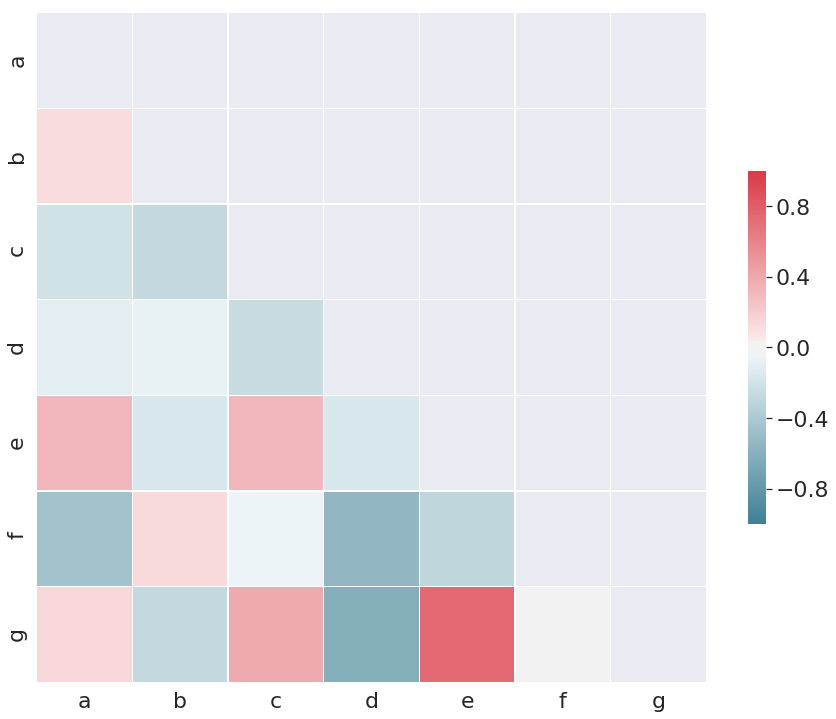

In [272]:
dsgutils.pd.viz.display_corr_matrix(df, on_columns=['a', 'b','c', 'd', 'e', 'f', 'g']);

Return the ax and put a title on it

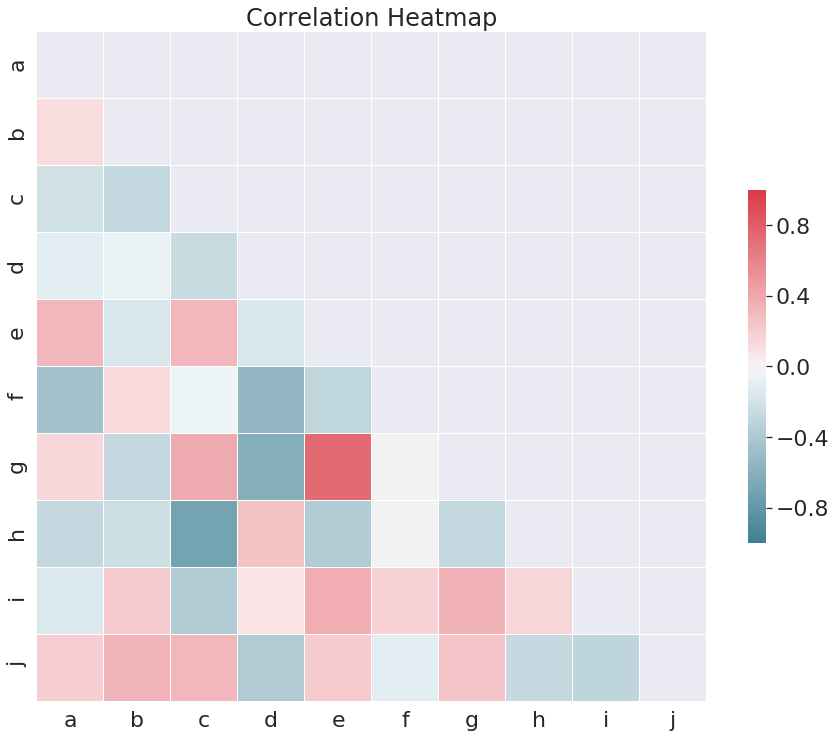

In [273]:
ax = dsgutils.pd.viz.display_corr_matrix(df, on_columns=list(ascii_letters[:10]))
ax.set_title('Correlation Heatmap');

Add a custom color map

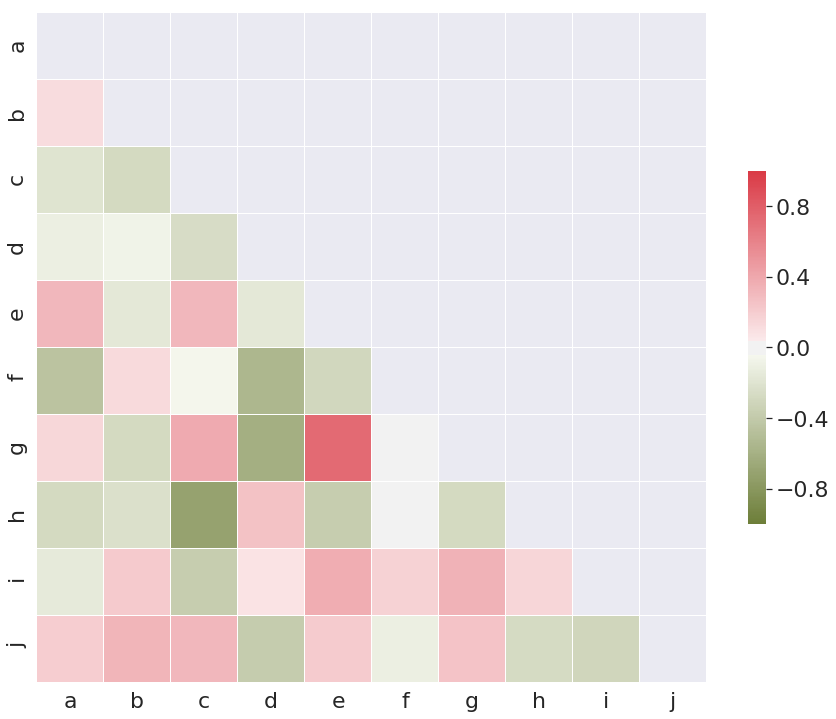

In [274]:
cmap = sns.diverging_palette(100, 10, as_cmap=True)
ax = dsgutils.pd.viz.display_corr_matrix(df, on_columns=list(ascii_letters[:10]), cmap=cmap);

#### `display_stacked_bar`

In [275]:
import string

In [276]:
main_column = list(string.ascii_uppercase[:5])  # A, B, C, D, E
stack_columns = list(string.ascii_lowercase[:3])

df = pd.DataFrame.from_dict({'Main': list(np.random.choice(main_column, 200, replace=True)),
                             'Stack': list(np.random.choice(stack_columns, 200, replace=True))})

In [277]:
df

,Main,Stack
0,A,b
1,B,b
2,E,c
3,E,a
4,C,a
5,E,a
6,E,c
7,B,c
8,E,c
9,E,c


Plot simple stacked bar plot

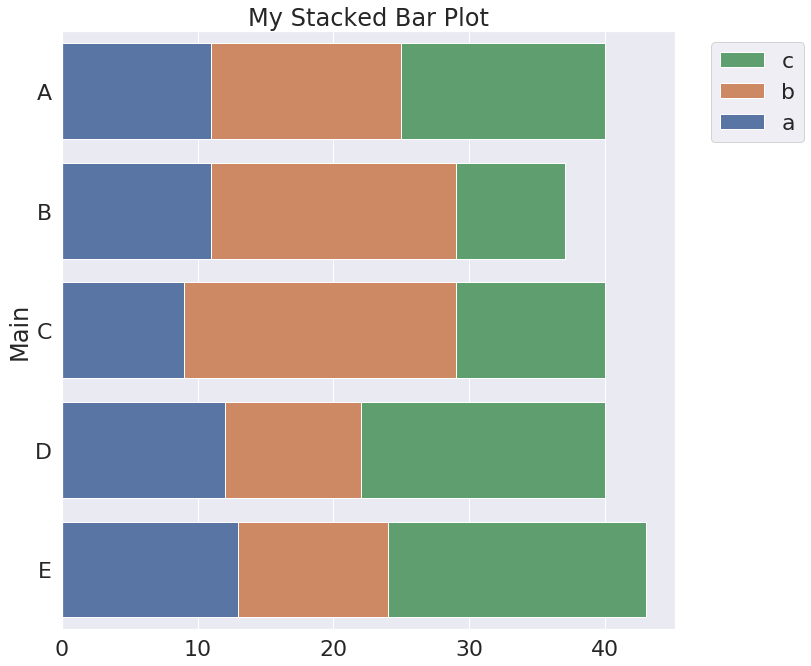

In [278]:
ax = dsgutils.pd.viz.display_stacked_cat_bar(df, groupby='Main', on='Stack')
ax.set(title='My Stacked Bar Plot');

Same plot, but vertical

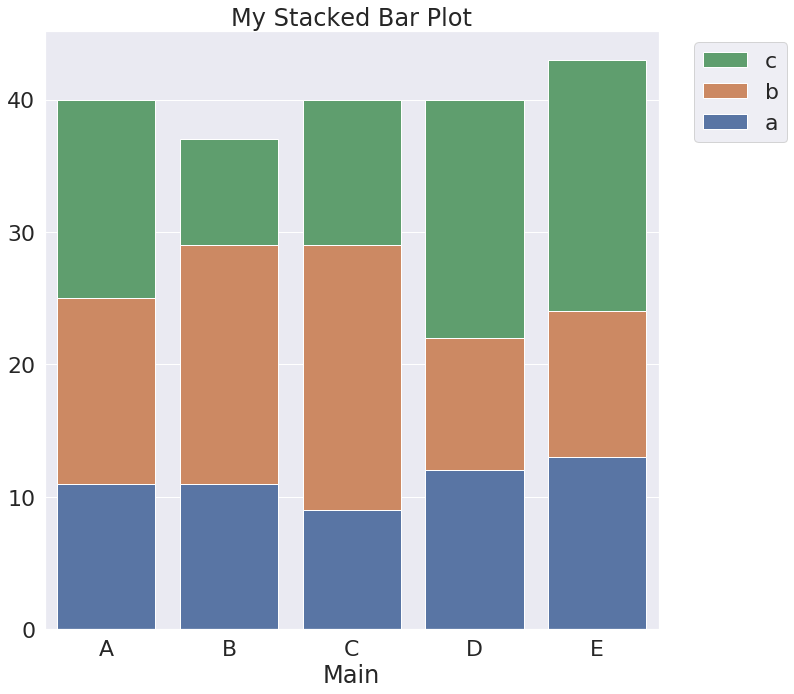

In [279]:
ax = dsgutils.pd.viz.display_stacked_cat_bar(df, groupby='Main', on='Stack', horizontal=False)
ax.set(title='My Stacked Bar Plot');

Plot the same barplot, but scale to a 100

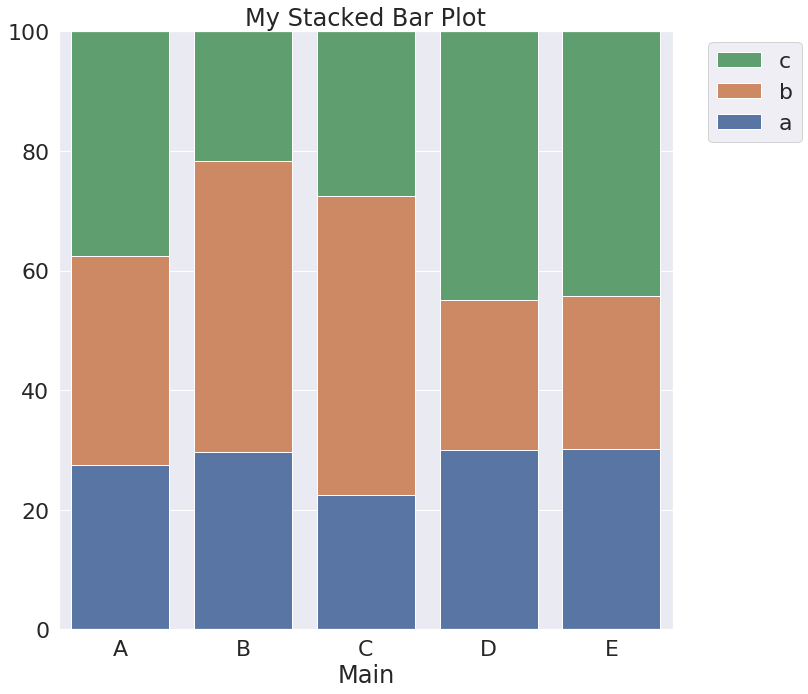

In [280]:
ax = dsgutils.pd.viz.display_stacked_cat_bar(df, groupby='Main', on='Stack', horizontal=False, unit=100)
ax.set(title='My Stacked Bar Plot');

Add your custum pallette

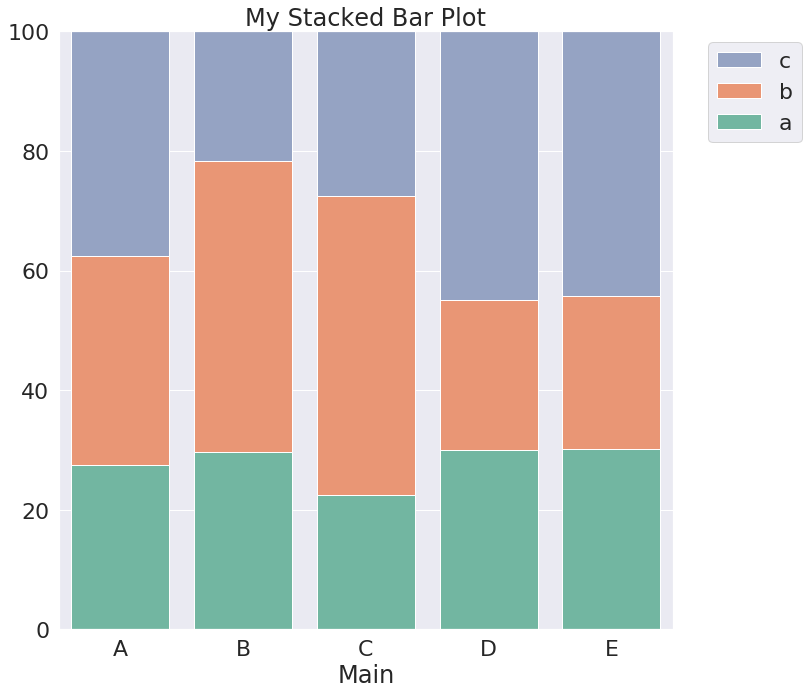

In [281]:
ax = dsgutils.pd.viz.display_stacked_cat_bar(df, groupby='Main', on='Stack', horizontal=False, unit=100, palette=sns.color_palette('Set2'))
ax.set(title='My Stacked Bar Plot');

#### `show_data`

In [282]:
dsgutils.pd.viz.show_data(df_prod)

The Data contains **100** rows.

*__Sample of the data :__*

,product_id,store_id,customer_id,day_id,product_name,product_brand,month,year,date,date_year,date_month
0,9.0,2.0,1.0,13.0,tee-shirt,addidas,may,2017,2018-07-01,2018,7
1,4.0,3.0,4.0,1.0,short,puma,dec,2017,2017-03-01,2017,3
2,6.0,1.0,28.0,13.0,basket,addidas,dec,2017,2018-09-01,2018,9
3,7.0,1.0,28.0,5.0,basket,oxbow,sept,2017,2018-08-01,2018,8
4,4.0,2.0,8.0,23.0,short,addidas,dec,2017,2017-12-01,2017,12


#### `na_count`

In [320]:
df_prod = df_prod.append({'product_id': 5, 'store_id' : 5, 'customer_id' : 3, 'day_id' : 12, 'product_name': np.nan,
                'product_brand' : 'addidas'}, ignore_index=True)

In [321]:
dsgutils.pd.viz.na_count(df_prod)

Size of the current file is: (102, 12)



*__Percentage of Na per columns in the data:__*

      column_name  na_size  na_size_percentage
4    product_name        2                1.96
6           month        2                1.96
7            year        2                1.96
8            date        2                1.96
9       date_year        2                1.96
10     date_month        2                1.96
11    Correlation        2                1.96
1        store_id        1                0.98
0      product_id        0                0.00
2     customer_id        0                0.00
3          day_id        0                0.00
5   product_brand        0                0.00



#### `percentage_missing_plots`

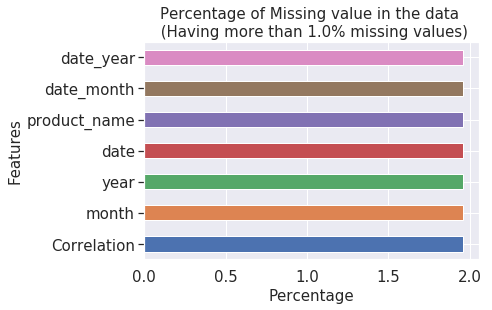

In [323]:
dsgutils.pd.viz.percentage_missing_plots(df_prod, perc_missing = 0.01, save_plot = False, path_dir = None)

#### `data_all_types`

In [324]:
dsgutils.pd.viz.data_all_types(df_prod)

**Type of every column in the data**


product_id              float64
store_id                 object
customer_id              object
day_id                   object
product_name             object
product_brand            object
month                    object
year                     object
date             datetime64[ns]
date_year               float64
date_month              float64
Correlation             float64
dtype: object


#### `zero_one_card`

In [355]:
df_new = df_prod.copy()
df_new['c'] = 2
df_new.head()

,product_id,store_id,customer_id,day_id,product_name,product_brand,month,year,date,date_year,date_month,Correlation,c
0,9.0,2.0,1.0,13.0,tee-shirt,addidas,may,2017,2018-07-01,2018.0,7.0,0.231455,2
1,4.0,3.0,4.0,1.0,short,puma,dec,2017,2017-03-01,2017.0,3.0,-0.019668,2
2,6.0,1.0,28.0,13.0,basket,addidas,dec,2017,2018-09-01,2018.0,9.0,-0.130059,2
3,7.0,1.0,28.0,5.0,basket,oxbow,sept,2017,2018-08-01,2018.0,8.0,-0.627632,2
4,4.0,2.0,8.0,23.0,short,addidas,dec,2017,2017-12-01,2017.0,12.0,-0.223607,2


In [356]:
dsgutils.pd.viz.zero_one_card(df_new)

* Columns: *c* have less than two different values

*   *c* has 1 differents values :[2]

#### `same_num_of_unique_val`

In [357]:
dsgutils.pd.viz.same_num_of_unique_val(df_prod)

* *month* and *date_month* have same number of values 

* *month* and *Correlation* have same number of values 

* *year* and *date_year* have same number of values 

* *date_month* and *Correlation* have same number of values 

#### `data_categorical`

In [290]:
cat_features =dsgutils.pd.viz.data_categorical(df_prod, cat_features = [], cont_features = [])

Categorical features :  product_id store_id customer_id day_id product_name product_brand month year


**Number of unique values for every feature:**

               Unique values
customer_id               41
day_id                    30
month                     12
product_id                11
store_id                   4
product_brand              4
product_name               3
year                       2


**5 uniques samples of every Categorical Features :**

  day_id product_name  year customer_id product_id store_id product_brand  \
0   13.0    tee-shirt  2017         1.0        9.0      2.0       addidas   
1    1.0        short  2018         4.0        4.0      3.0          puma   
2    5.0       basket  None        28.0        6.0      1.0         oxbow   
3   23.0         None  None         8.0        7.0      0.0          nike   
4   28.0         None  None         0.0        1.0     None          None   

   month  
0    may  
1    dec  
2   sept  
3  april  
4   july  


#### `data_continuous`

In [291]:
cat_features = dsgutils.pd.viz.data_continuous(df_prod, ['date_year', 'date_month'], ['day_id'])

Continuous features :  day_id


**Description of continuous columns:**

       day_id
count     100
unique     30
top      11.0
freq        7


####  `value_count_plot`

In [292]:
df_prod.head(5)

,product_id,store_id,customer_id,day_id,product_name,product_brand,month,year,date,date_year,date_month
0,9.0,2.0,1.0,13.0,tee-shirt,addidas,may,2017,2018-07-01,2018,7
1,4.0,3.0,4.0,1.0,short,puma,dec,2017,2017-03-01,2017,3
2,6.0,1.0,28.0,13.0,basket,addidas,dec,2017,2018-09-01,2018,9
3,7.0,1.0,28.0,5.0,basket,oxbow,sept,2017,2018-08-01,2018,8
4,4.0,2.0,8.0,23.0,short,addidas,dec,2017,2017-12-01,2017,12


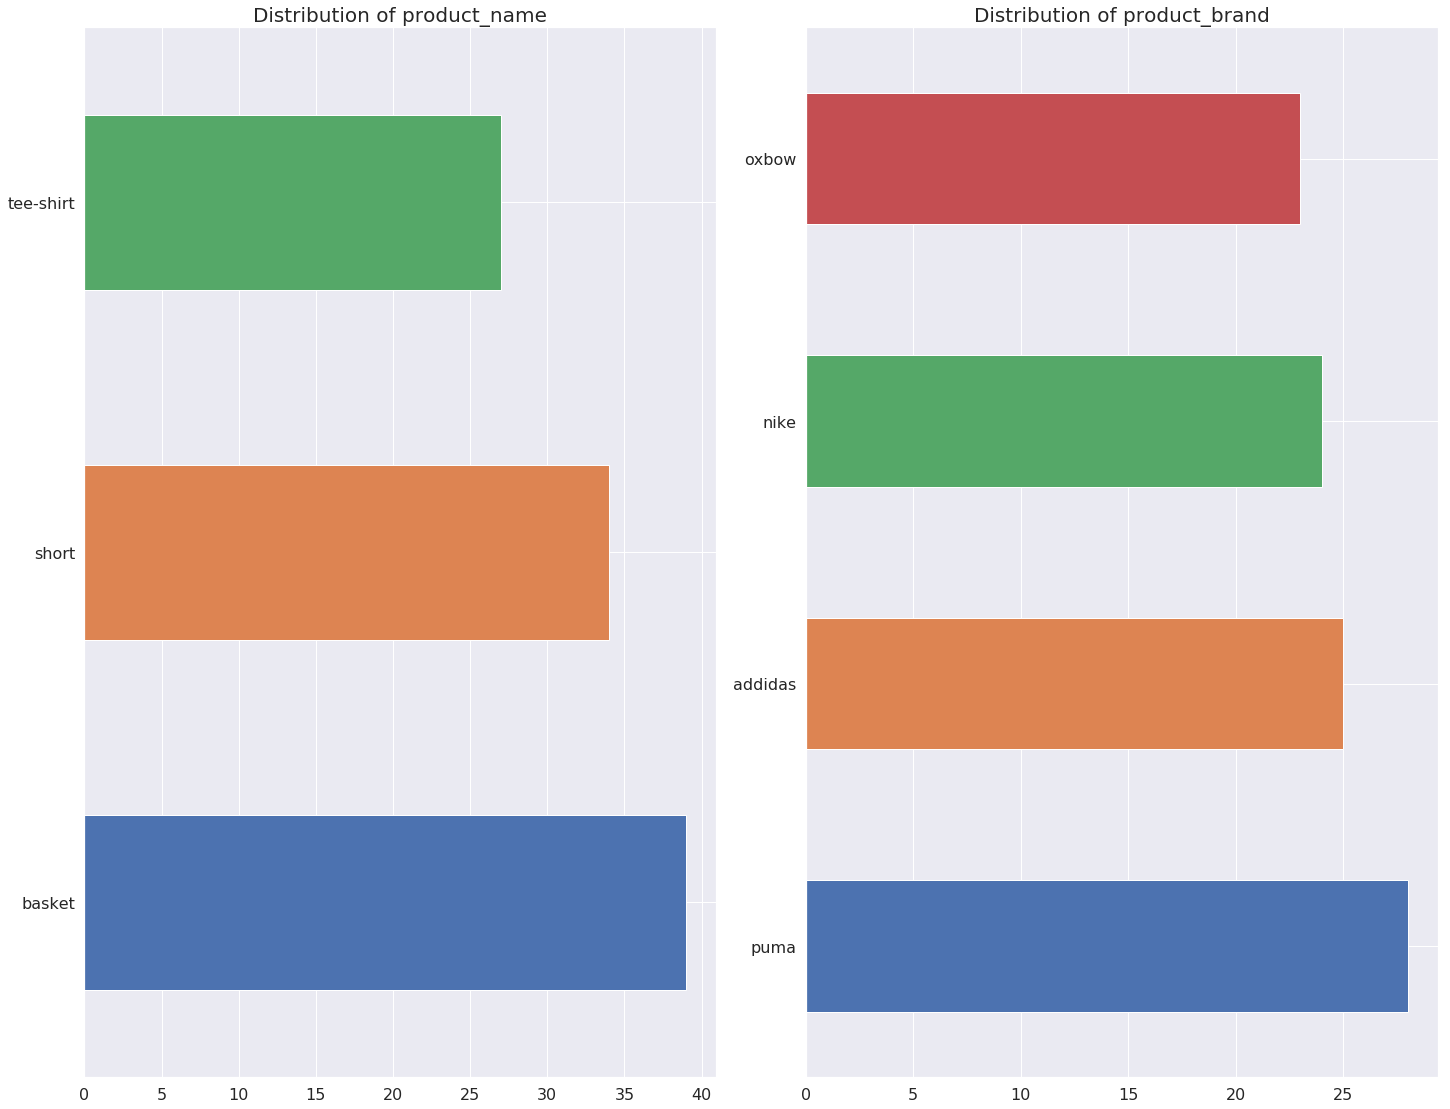

In [293]:
dsgutils.pd.viz.value_count_plot(df_prod, ['product_name', 'product_brand'], save_plot = False, path_dir = None )

#### `value_count_top`

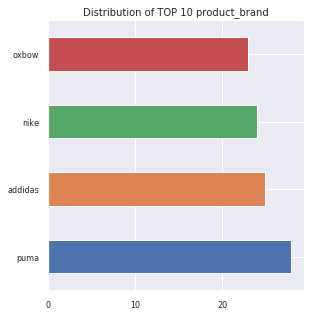

In [294]:
dsgutils.pd.viz.value_count_top(df_prod, ['product_brand'], save_plot = False, path_dir = None, top = 10 )

#### `value_count_bottom`

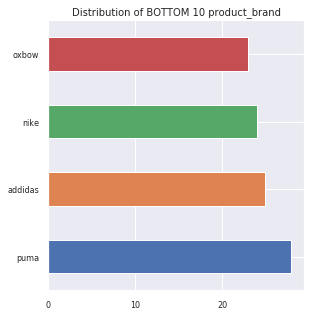

In [295]:
dsgutils.pd.viz.value_count_bottom(df_prod, ['product_brand'], save_plot = False, path_dir = None, bottom = 10 )

#### `distrib_numerical`

In [296]:
df_5 = pd.DataFrame(data= np.random.rand(100, 5)*15,
                 columns=list(ascii_letters[:5]))
df_5['a'] = np.round(df_5['a'])
df_5.head(10)

,a,b,c,d,e
0,1.0,1.084807,3.977113,14.694616,13.500207
1,5.0,13.989573,2.457572,13.243213,11.556304
2,3.0,11.408887,1.495292,7.884022,1.825438
3,11.0,3.262806,4.417591,6.184287,10.477199
4,1.0,7.228939,5.187203,11.889291,2.818626
5,10.0,12.221584,6.381309,5.804320,14.173417
6,8.0,13.710298,4.876537,0.079387,1.250785
7,14.0,13.403003,6.681800,3.253622,3.940875
8,14.0,14.655633,8.847826,3.368030,14.375392
9,12.0,0.367644,7.033322,10.192290,6.083072


/home/meghan/python3-dsgutils/dsgutilsenv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


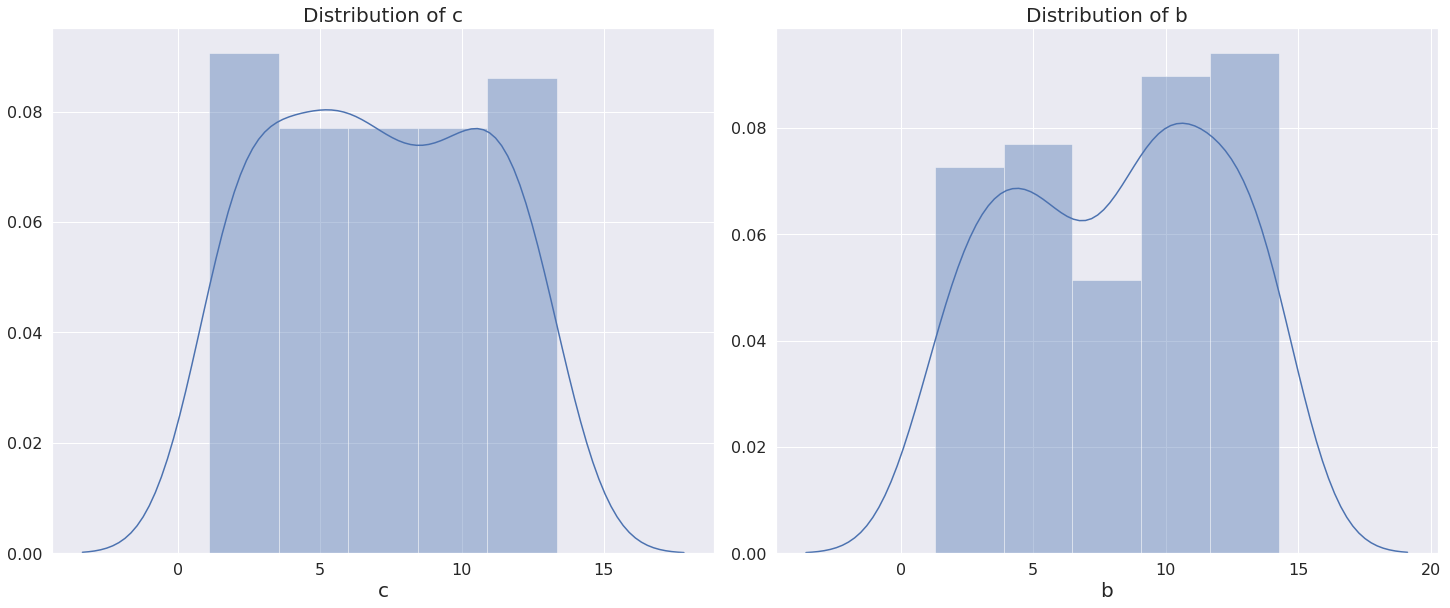

In [297]:
dsgutils.pd.viz.distrib_numerical(df_5, ['b', 'c'] , percentiles = 0.05, kde = True, save_plot = False, path_dir = None)

#### `box_plot_continuous`

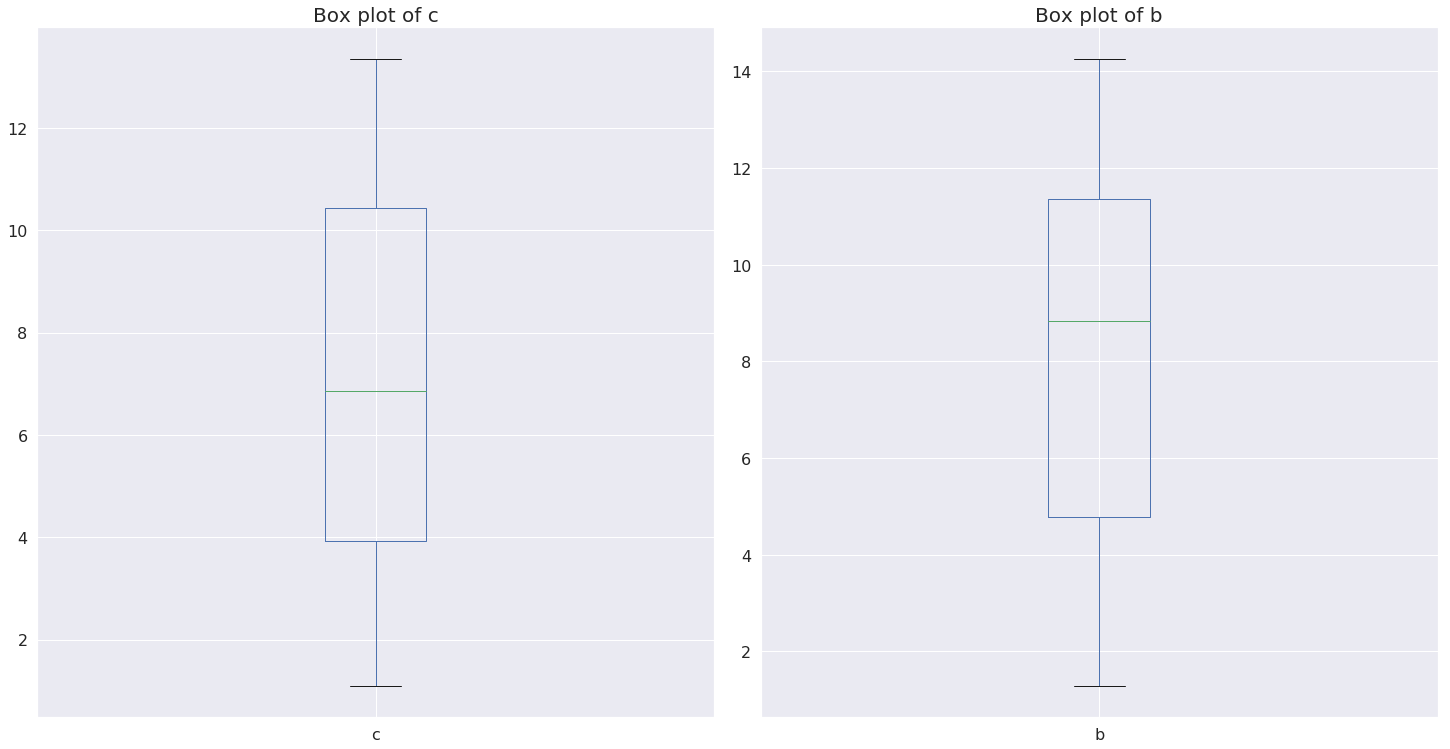

In [298]:
dsgutils.pd.viz.box_plot_continuous(df_5, ['b', 'c'], percentiles = 0.05, save_plot = False, path_dir = None)

#### `count_month_year`

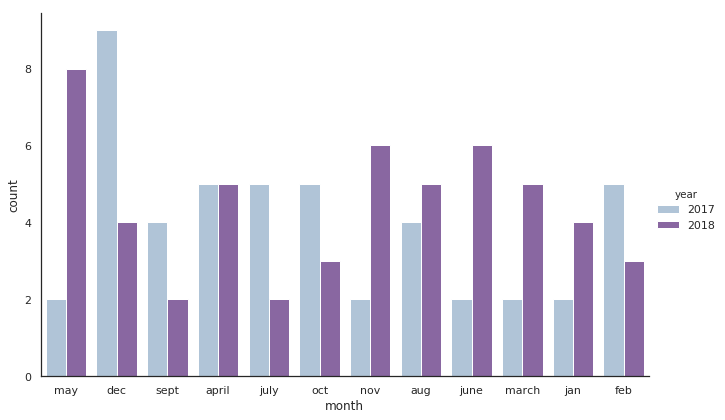

In [299]:
dsgutils.pd.viz.count_month_year (df_prod,'month','year', save_plot = False, path_dir = None)

#### `count_plot_col_per_date`

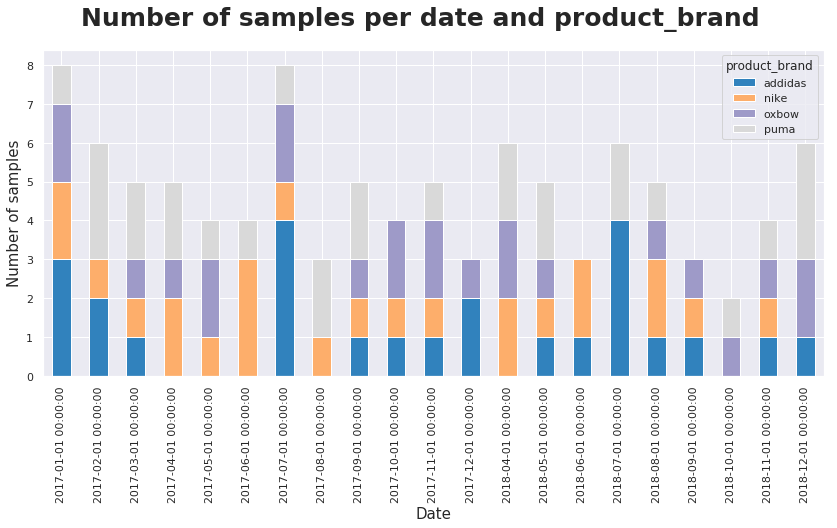

In [300]:
dsgutils.pd.viz.count_plot_col_per_date(df_prod, 'date', 'product_brand', num_label = 1, save_plot = False, path_dir = None)

#### `countplot_cat1`

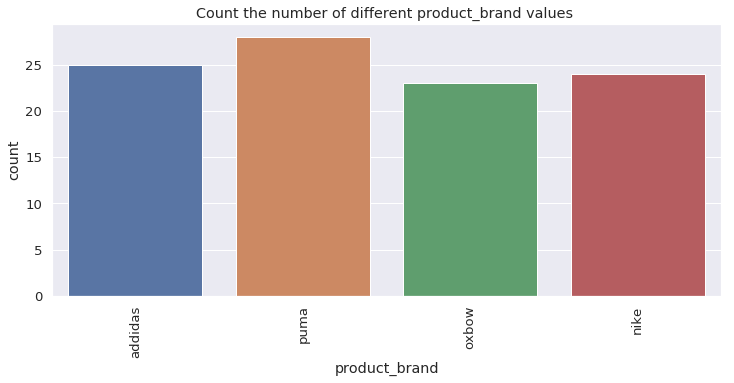

In [301]:
dsgutils.pd.viz.countplot_cat1(df_prod, 'product_brand', title_suffix = '', perc = False, num_label = 1, save_plot = False, path_dir = None)

#### `density_plot_cat1`

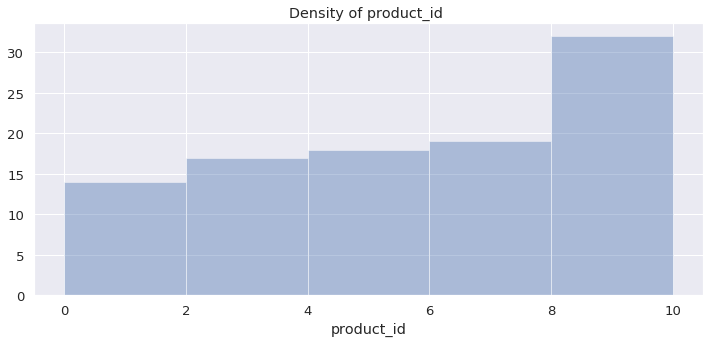

In [302]:
df_prod['product_id'] =df_prod['product_id'].astype(float)
dsgutils.pd.viz.density_plot_cat1(df_prod, 'product_id', bins =5, kde = False, title_suffix = '', save_plot = False, path_dir = None )

#### `num_of_cat2_per_cat1`

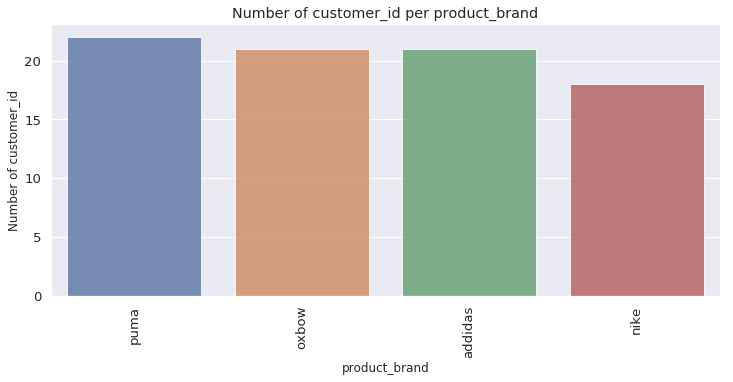

In [303]:
dsgutils.pd.viz.num_of_cat2_per_cat1(df_prod, 'product_brand', 'customer_id', figsize=(12,5), normalize = False, num_label = 1, save_plot = False, path_dir = None )

#### `count_of_cat2_per_cat1`

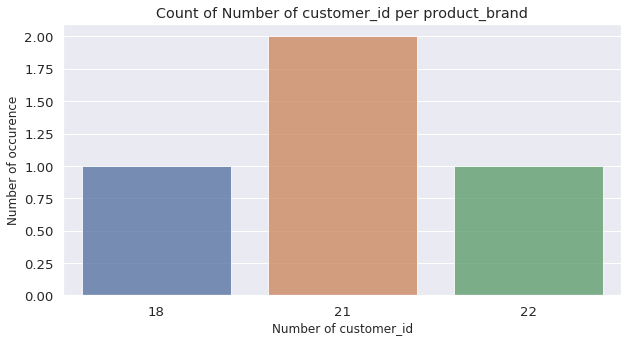

In [304]:
dsgutils.pd.viz.count_of_cat2_per_cat1(df_prod, 'product_brand', 'customer_id', figsize=(10,5), xlim =None, ylim= None, num_label =1, save_plot = False, path_dir = None)

#### `count_of_cat3_per_cat1cat2`

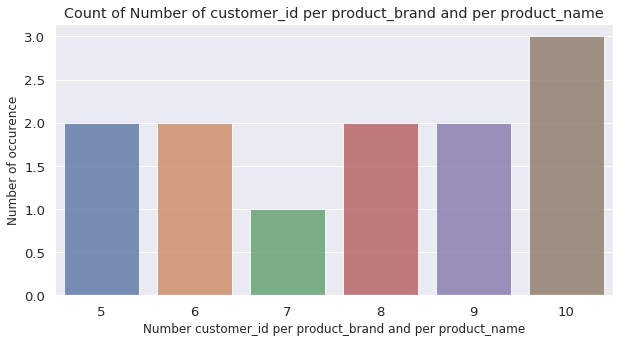

In [305]:
dsgutils.pd.viz.count_of_cat3_per_cat1cat2(df_prod, 'product_brand', 'product_name', 'customer_id', num_label=1, save_plot = False, path_dir = None )

#### `boxplot_2_features`

In [306]:
df_5.head()

,a,b,c,d,e
0,1.0,1.084807,3.977113,14.694616,13.500207
1,5.0,13.989573,2.457572,13.243213,11.556304
2,3.0,11.408887,1.495292,7.884022,1.825438
3,11.0,3.262806,4.417591,6.184287,10.477199
4,1.0,7.228939,5.187203,11.889291,2.818626


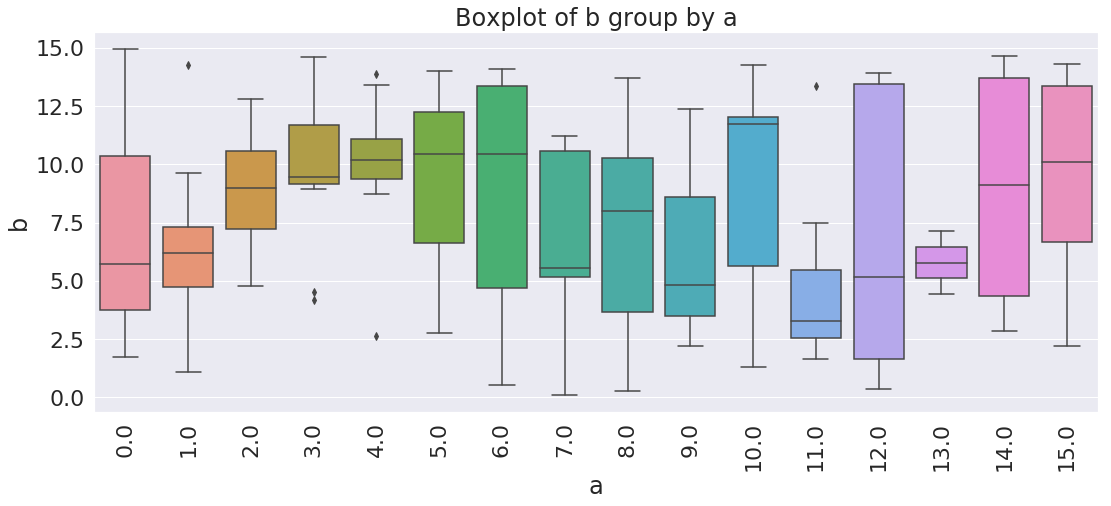

In [307]:
dsgutils.pd.viz.boxplot_2_features(df_5, 'a', 'b', ylim_i = 0, set_y_limit = False, order_boxplot = False, print_value = False, num_label = 1, save_plot = False, path_dir = None)

#### `scatter_2_features`

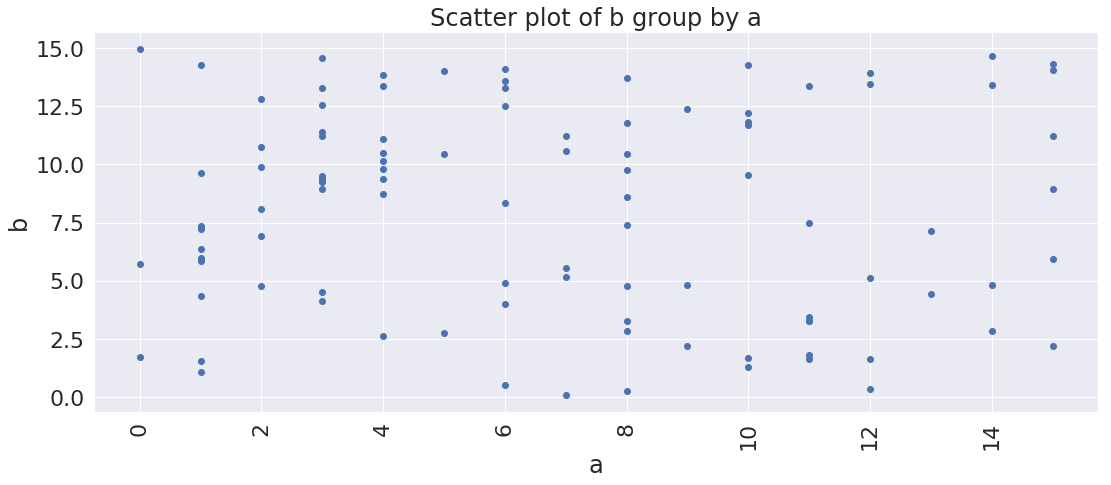

In [308]:
dsgutils.pd.viz.scatter_2_features(df_5, 'a', 'b', ylim_i = 0, set_y_limit = False, xlim_i = 0, set_x_limit = False, order_boxplot = False, print_value = False, num_label = 1)

#### `stacked_bar_plot`

In [309]:
df_prod.head()

,product_id,store_id,customer_id,day_id,product_name,product_brand,month,year,date,date_year,date_month
0,9.0,2.0,1.0,13.0,tee-shirt,addidas,may,2017,2018-07-01,2018,7
1,4.0,3.0,4.0,1.0,short,puma,dec,2017,2017-03-01,2017,3
2,6.0,1.0,28.0,13.0,basket,addidas,dec,2017,2018-09-01,2018,9
3,7.0,1.0,28.0,5.0,basket,oxbow,sept,2017,2018-08-01,2018,8
4,4.0,2.0,8.0,23.0,short,addidas,dec,2017,2017-12-01,2017,12


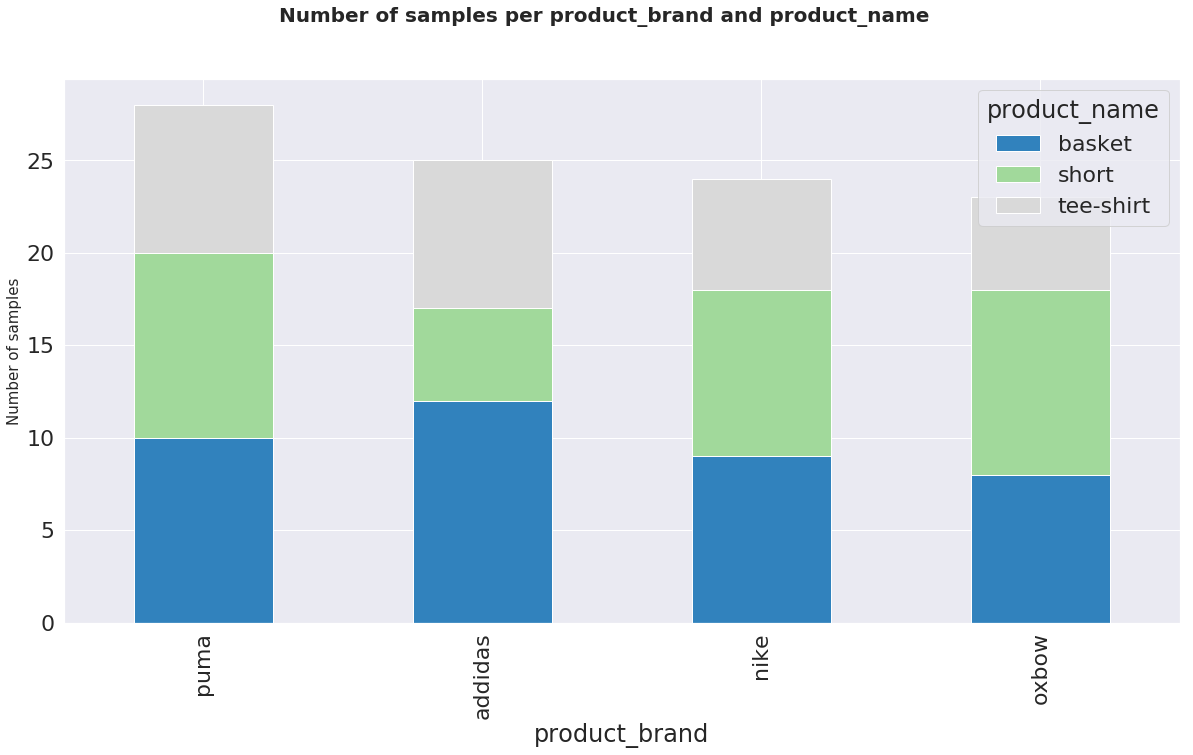

In [310]:
dsgutils.pd.viz.stacked_bar_plot(df_prod, 'product_brand', 'product_name', bar_size=30, nan_colums_thresh=0, figsize=(20, 10), percentile=0.001, plot_flag = 1, normalize = False, sort_bars = True, return_pivot = False)

#### `plot_correlations_per_categories`

In [361]:
from scipy import stats

def calculate_spearman_correlation_of_2_cat(df, group_x, group_y, cat1, cat2, feature_x, target_y):
    # select the current correlation slice
    df_curr = df.loc[(df[cat1] == group_x) & (df[cat2] == group_y), [cat1, cat2, feature_x, target_y]]
    # drop NAs
    df_curr.dropna(inplace=True)
    # Calculate the Spearman correlation
    corr_i, p_value = stats.spearmanr(df_curr[feature_x], df_curr[target_y])
    return(corr_i)

df_prod['Correlation'] = df_prod.apply(lambda x :
                                       calculate_spearman_correlation_of_2_cat(df_prod, x['product_brand'], x['product_name'], 'product_brand',
                                                                    'product_name', 'customer_id', 'store_id'), axis=1 )

/home/meghan/python3-dsgutils/dsgutilsenv/lib/python3.5/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [362]:
df_prod.head()

,product_id,store_id,customer_id,day_id,product_name,product_brand,month,year,date,date_year,date_month,Correlation
0,9.0,2.0,1.0,13.0,tee-shirt,addidas,may,2017,2018-07-01,2018.0,7.0,0.231455
1,4.0,3.0,4.0,1.0,short,puma,dec,2017,2017-03-01,2017.0,3.0,-0.019668
2,6.0,1.0,28.0,13.0,basket,addidas,dec,2017,2018-09-01,2018.0,9.0,-0.130059
3,7.0,1.0,28.0,5.0,basket,oxbow,sept,2017,2018-08-01,2018.0,8.0,-0.627632
4,4.0,2.0,8.0,23.0,short,addidas,dec,2017,2017-12-01,2017.0,12.0,-0.223607


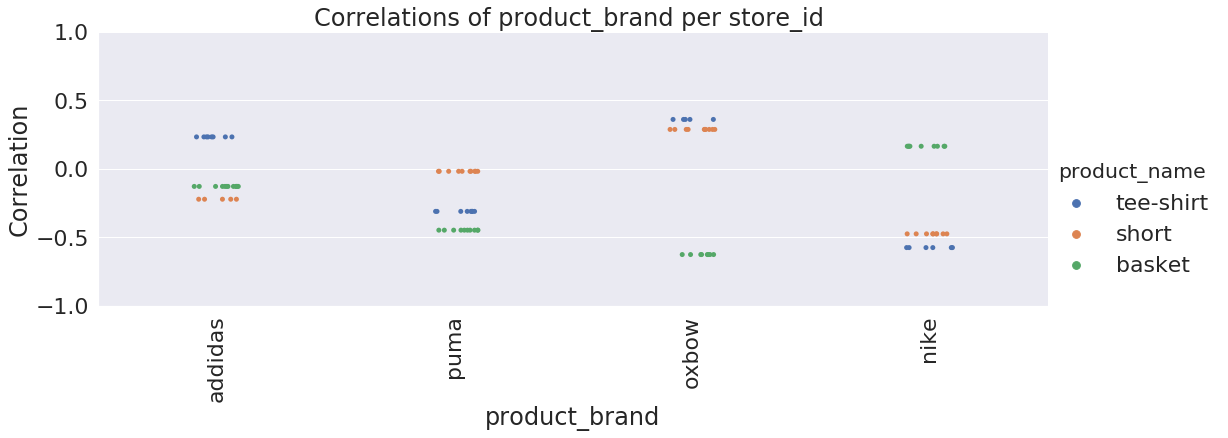

In [363]:
dsgutils.pd.viz.plot_correlations_per_categories(df_prod, 'product_brand', 'product_name', feature_x = 'product_brand', target_y = 'store_id', title_suffix = '')

### feateng

#### `alphanumeric_feature`

In [390]:
import random, string
df_prod['comment'] = pd.Series([''.join([random.choice(string.printable) for n in range(10)]) for i in range(102)], index=df_prod.index)

In [389]:
df_prod.head()

,product_id,store_id,customer_id,day_id,product_name,product_brand,month,year,date,date_year,date_month,Correlation,comment
0,9.0,2.0,1.0,13.0,tee-shirt,addidas,may,2017,2018-07-01,2018.0,7.0,0.231455,JSCc$IW78Y
1,4.0,3.0,4.0,1.0,short,puma,dec,2017,2017-03-01,2017.0,3.0,-0.019668,Pr'+KO#C?a
2,6.0,1.0,28.0,13.0,basket,addidas,dec,2017,2018-09-01,2018.0,9.0,-0.130059,E#\aNsk*T%
3,7.0,1.0,28.0,5.0,basket,oxbow,sept,2017,2018-08-01,2018.0,8.0,-0.627632,ZlE!t\HlC'
4,4.0,2.0,8.0,23.0,short,addidas,dec,2017,2017-12-01,2017.0,12.0,-0.223607,"oHfya<,& n"


In [414]:
from dsgutils.pd import feateng
df_new = feateng.alphanumeric_feature(df_prod, 'comment')

Finish writing the new alpha numeric column : alpha_num_ comment


In [415]:
df_new.head()

,product_id,store_id,customer_id,day_id,product_name,product_brand,month,year,date,date_year,date_month,Correlation,comment,alpha_num_comment
0,9.0,2.0,1.0,13.0,tee-shirt,addidas,may,2017,2018-07-01,2018.0,7.0,0.231455,u] OW2tx4^,u OW2tx4
1,4.0,3.0,4.0,1.0,short,puma,dec,2017,2017-03-01,2017.0,3.0,-0.019668,ChT_).(zn_,ChT zn
2,6.0,1.0,28.0,13.0,basket,addidas,dec,2017,2018-09-01,2018.0,9.0,-0.130059,e+rmcz0\rI,e rmcz0 I
3,7.0,1.0,28.0,5.0,basket,oxbow,sept,2017,2018-08-01,2018.0,8.0,-0.627632,~Km~_w3n&|,Km w3n
4,4.0,2.0,8.0,23.0,short,addidas,dec,2017,2017-12-01,2017.0,12.0,-0.223607,#_v5B'RLC@,v5B RLC
